**[Deep Learning Home Page](https://www.kaggle.com/learn/deep-learning)**

---


# Intro
The TV show *Silicon Valley* had an app called "See Food" that promised to identify food. 

In this notebook, you will write code using and comparing pre-trained models to choose one as an engine for the See Food app.

You won't go too deep into Keras or TensorFlow details in this particular exercise.  Don't worry. You'll go deeper into model development soon.  For now, you'll make sure you know how to use pre-trained models.

# Set-Up

We will run a few steps of environmental set-up before writing your own code. **You don't need to understand the details of this set-up code.** You can just run each code cell until you get to the exercises.

## 1. Create Image Paths
This workspace includes image files you will use to test your models. Run the cell below to store a few filepaths to these images in a variable `img_paths`.

In [1]:
import os
from os.path import join

hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'
hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

## 2. Run an Example Model
Here is the code you saw in the tutorial. It loads data, loads a pre-trained model, and makes predictions. Run this cell too.

In [2]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


# define model
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
# preprocess data
test_data = read_and_prep_images(img_paths)
# make predictions
preds = my_model.predict(test_data)

## 3. Visualize Predictions

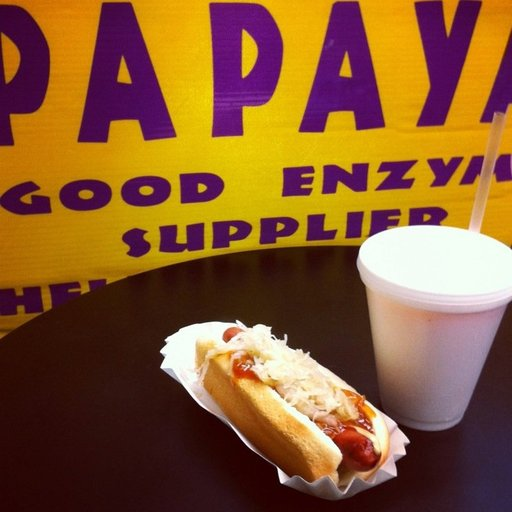

[('n07697537', 'hotdog', 0.90688556), ('n01981276', 'king_crab', 0.051902413), ('n07697313', 'cheeseburger', 0.0054891463)]


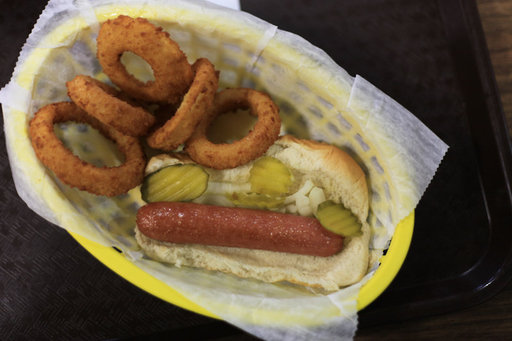

[('n07697537', 'hotdog', 0.97324187), ('n07697313', 'cheeseburger', 0.023891283), ('n02776631', 'bakery', 0.00057565)]


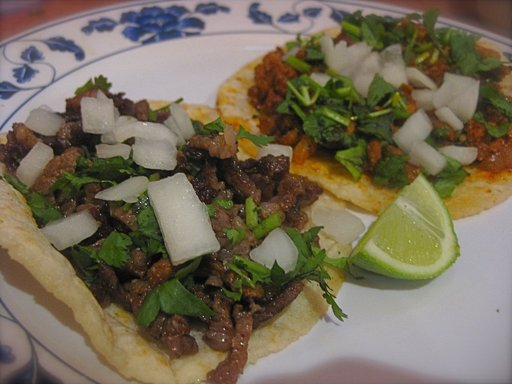

[('n07579787', 'plate', 0.84794545), ('n07880968', 'burrito', 0.050176352), ('n07697537', 'hotdog', 0.045182604)]


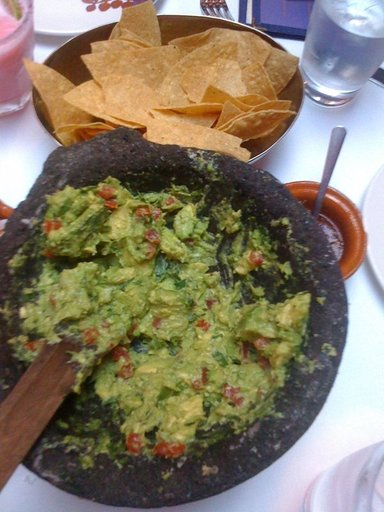

[('n07583066', 'guacamole', 0.99991214), ('n03786901', 'mortar', 2.3132796e-05), ('n07579787', 'plate', 1.1259077e-05)]


In [3]:
# decode predictions
from learntools.deep_learning.decode_predictions import decode_predictions
most_likely_labels = decode_predictions(preds, top=3)

# display
from IPython.display import Image, display
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [4]:
# inspect the source of hidden functions
from inspect import getsource
print(getsource(decode_predictions))

def decode_predictions(preds, top=5, class_list_path='../input/resnet50/imagenet_class_index.json'):
  """Decodes the prediction of an ImageNet model.
  Arguments:
      preds: Numpy tensor encoding a batch of predictions.
      top: integer, how many top-guesses to return.
      class_list_path: Path to the canonical imagenet_class_index.json file
  Returns:
      A list of lists of top class prediction tuples
      `(class_name, class_description, score)`.
      One list of tuples per sample in batch input.
  Raises:
      ValueError: in case of invalid shape of the `pred` array
          (must be 2D).
  """
  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
  CLASS_INDEX = json.load(open(class_list_path))
  results = []
  for pred in preds:
    top

## 4. Set Up Code Checking
As a last step before writing your own code, run the following cell to enable feedback on your code.

In [5]:
# set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_3 import *
print("Setup Complete")

Setup Complete


<hr/>

# Exercises

You will write a couple useful functions in the next exercises. Then you will put these functions together to compare the effectiveness of various pretrained models for your hot-dog detection program.

## Exercise 1

We want to distinguish whether an image is a hot dog or not. But our models classify pictures into 1000 different categories. Write a function that takes the models predictions (in the same format as `preds` from the set-up code) and returns a list of `True` and `False` values.

Some tips:
- Work iteratively. Figure out one line at a time outsie the function, and print that line's output to make sure it's right. Once you have all the code you need, move it into the function `is_hot_dog`. If you get an error, check that you have copied the right code and haven't left anything out.
- The raw data we loaded in `img_paths` had two images of hot dogs, followed by two images of other foods. So, if you run your function on `preds`, which represents the output of the model on these images, your function should return `[True, True, False, False]`.
- You will want to use the `decode_predictions` function that was also used in the code provided above. We provided a line with this in the code cell to get you started.




In [6]:
# the following lines are given as a hint to get you started
decoded = decode_predictions(preds, top=1)
print(decoded)

[[('n07697537', 'hotdog', 0.90688556)], [('n07697537', 'hotdog', 0.97324187)], [('n07579787', 'plate', 0.84794545)], [('n07583066', 'guacamole', 0.99991214)]]


In [7]:
def is_hot_dog(preds):
    '''
    inputs:
    preds_array:  array of predictions from pre-trained model

    outputs:
    is_hot_dog_list: a list indicating which predictions show hotdog as the most likely label
    '''
    # decode predictions
    decoded = decode_predictions(preds, top=1)
    
    # pull out predicted label, which is in d[0][1] due to how decode_predictions structures results
    labels = [item[0][1] for item in decoded]
    output = [label == 'hotdog' for label in labels]
    return output
    
# check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
# if you'd like to see a hint or the solution, uncomment the appropriate line below
# q_1.hint()
# q_1.solution()

<hr/>

## Exercise 2: Evaluate Model Accuracy

You have a model (called `my_model`). Is it good enough to build your app around? 

Find out by writing a function that calculates a model's accuracy (fraction correct). You will try an alternative model in the next step. So we will put this logic in a reusable function that takes data and the model as arguments, and returns the accuracy. Fraction Correct (FC) is the ratio of the number of correct classifications to the total population:

$$ FC=(TP+TN)/(TP+TN+FP+FN) $$

Tips:

 - Use the `is_hot_dog` function from above to help write your function
 - To save you some scrolling, here is the code from above where we used a TensorFlow model to make predictions:

```
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)
```

In [9]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    # calc true positive
    images_hotdog = read_and_prep_images(paths_to_hotdog_images)
    P = len(paths_to_hotdog_images)
    preds_hotdog = model.predict(images_hotdog)
    TP = sum(is_hot_dog(preds_hotdog))
    
    # calc true negative
    images_other = read_and_prep_images(paths_to_other_images)
    N = len(paths_to_other_images)
    preds_other = model.predict(images_other)
    TN = N - sum(is_hot_dog(preds_other))
    
    # return FC accuracy
    return (TP+TN) / (P+N)

# code to call calc_accuracy.  my_model, hot_dog_paths and not_hot_dog_paths were created in the setup code
my_model_accuracy = calc_accuracy(my_model, hot_dog_paths, not_hot_dog_paths)
print("Fraction correct in small test set: {}".format(my_model_accuracy))

# check your answer
q_2.check()

Fraction correct in small test set: 1.0
Testing model on larger dataset. This takes a few seconds. 


Larger dataset model accuracy: 0.825


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [10]:
# if you'd like a hint or the solution, uncomment the appropriate line below
# q_2.hint()
# q_2.solution()

<hr/>

## Exercise 3:
There are other models besides the ResNet model (which we have loaded). For example, an earlier winner of the ImageNet competition is the VGG16 model.  Don't worry about the differences between these models yet. We'll come back to that later. For now, just focus on the mechanics of applying these models to a problem.

The code used to load a pretrained ResNet50 model was

```
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
```

The weights for the model are stored at `../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5`.

In the cell below, create a VGG16 model with the preloaded weights. Then use your `calc_accuracy` function to determine what fraction of images the VGG16 model correctly classifies.  Is it better or worse than the pretrained ResNet model?

In [11]:
# import the model
from tensorflow.keras.applications import VGG16


vgg16_model = VGG16(weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
# calculate accuracy on small dataset as a test
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

# check your answer
q_3.check()

Fraction correct in small dataset: 1.0
Testing VGG16 on a larger dataset. This can take a few seconds


Accuracy of VGG16 on larger dataset is 0.775


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
# uncomment the appropriate line below if you'd like a hint or the solution
# q_3.hint()
# q_3.solution()

If this model is used for an app that runs on a phone, what factors besides accuracy might you care about? After you've thought about it, keep going below.

# Keep Going
You are ready for **[Transfer Learning](https://www.kaggle.com/dansbecker/transfer-learning/)**, which will allow you to apply the same level of power for your custom purposes.


---
**[Deep Learning Home Page](https://www.kaggle.com/learn/deep-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*